In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
from matplotlib import pyplot as plt

##### Gather top 5 most activly traded ETFs

In [2]:
date = '20150101'
EEM= pdr.get_data_yahoo('EEM',start=date)
#EEM.drop('Adj Close',axis=1,inplace=True)
EEM.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,39.209999,38.669998,39.189999,38.770000,65010000.0,34.665909
2015-01-05,38.520000,38.020000,38.520000,38.080002,83166600.0,34.048954
2015-01-06,38.259998,37.720001,38.090000,37.919998,52066100.0,33.905880
2015-01-07,38.770000,38.439999,38.570000,38.740002,64948700.0,34.639084
2015-01-08,39.580002,39.259998,39.310001,39.400002,55081600.0,35.229214


#### Using Numba for VWAP calculation

In [3]:
from numba import jit
v=EEM.Volume.values
h = EEM.High.values
l=EEM.Low.values
@jit
def np_vwap():
    return np.cumsum(v*(h+l)/2) / np.cumsum(v)
EEM['Vwap']=np_vwap()

In [4]:
EEM.head()

,High,Low,Open,Close,Volume,Adj Close,Vwap
Date,,,,,,,
2015-01-02,39.209999,38.669998,39.189999,38.770000,65010000.0,34.665909,38.939999
2015-01-05,38.520000,38.020000,38.520000,38.080002,83166600.0,34.048954,38.563951
2015-01-06,38.259998,37.720001,38.090000,37.919998,52066100.0,33.905880,38.414715
2015-01-07,38.770000,38.439999,38.570000,38.740002,64948700.0,34.639084,38.461318
2015-01-08,39.580002,39.259998,39.310001,39.400002,55081600.0,35.229214,38.626195


    item['Upper Band'] = item['30 Day MA'] + (item['30 Day STD'] * 2)
    item['Lower Band'] = item['30 Day MA'] - (item['30 Day STD'] * 2)

In [5]:
def Rollback_prep(df):
    df['9_day_MA']=df.Open.rolling(9).mean()
    df['9_day_stdiv']=df.Open.rolling(9).std()
    df['21_day_MA']=df.Open.rolling(21).mean()
    df['21_day_stdiv']=df.Open.rolling(21).std()
    df['30_day_MA']=df['Adj Close'].rolling(window=20).mean()
    df['30_day_stdiv']=df['Adj Close'].rolling(window=20).std()
    

In [6]:
def Bollinger_Bands(df):
    df['Boillinger_Upper_band_9']=df['9_day_MA']+(df['9_day_stdiv']*2)
    df['Boillinger_Lower_band_9']=df['9_day_MA']-(df['9_day_stdiv']*2)    
    df['Boillinger_Upper_band_21']=df['21_day_MA']+(df['21_day_stdiv']*2)
    df['Boillinger_Lower_band_21']=df['21_day_MA']-(df['21_day_stdiv']*2)
    df['Boillinger_Upper_band_30']=df['30_day_MA']+(df['30_day_stdiv']*2)
    df['Boillinger_Lower_band_30']=df['30_day_MA']-(df['30_day_stdiv']*2)

In [7]:
def vwap(df):
    q = df.Volume.values
    p = df['Adj Close'].values
    return df.assign(vwap=(p * q).cumsum() / q.cumsum())

df = EEM.groupby(EEM.index.date, group_keys=False).apply(vwap)
df.head(10)

,High,Low,Open,Close,Volume,Adj Close,Vwap,vwap
Date,,,,,,,,
2020-02-14,39.209999,38.669998,39.189999,38.770000,65010000.0,34.665909,38.939999,34.665909
2020-02-14,38.520000,38.020000,38.520000,38.080002,83166600.0,34.048954,38.563951,34.048954
2020-02-14,38.259998,37.720001,38.090000,37.919998,52066100.0,33.905880,38.414715,33.905880
2020-02-14,38.770000,38.439999,38.570000,38.740002,64948700.0,34.639084,38.461318,34.639084
2020-02-14,39.580002,39.259998,39.310001,39.400002,55081600.0,35.229214,38.626195,35.229214
2020-02-14,39.540001,39.150002,39.520000,39.270000,38550100.0,35.112972,38.703420,35.112972
2020-02-14,39.200001,38.900002,39.150002,38.950001,55381800.0,34.826851,38.749760,34.826851
2020-02-14,39.650002,38.970001,39.450001,39.290001,55565600.0,35.130856,38.816027,35.130856
2020-02-14,39.160000,38.759998,38.860001,39.070000,83761000.0,34.934143,38.837813,34.934143


In [8]:
def plotting_ggplot_Vwap(df):
    with plt.style.context('ggplot'):
        plt.figure(figsize=(10,6))
        plt.plot(df.Close,label='Close')
        plt.plot(df.Open,label='Open')
        plt.plot(df['Adj Close'],label='Adj Close')
        plt.plot(df.Vwap,label='Vwap')
        plt.legend(loc=2) 

/Users/anthonyplata/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


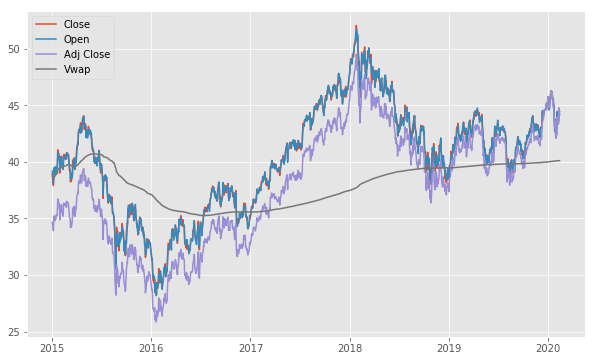

In [9]:
plotting_ggplot_Vwap(EEM)

In [10]:
def Boillinger_band_plt(EEM):
    Rollback_prep(EEM)
    Bollinger_Bands(EEM)
    with plt.style.context('ggplot'):
        plt.figure(figsize=(10,6))
        #plt.plot(EEM.Close,label='Close')
        #plt.plot(EEM.Open,label='Open')
        plt.plot(EEM['Adj Close'],label='Adj Close')
#        plt.plot(EEM.Vwap,label='Vwap')
        plt.plot(EEM['Boillinger_Upper_band_21'],label="Bollinger_21U")
        plt.plot(EEM['Boillinger_Lower_band_21'],label="Bollinger_21L")
        plt.plot(EEM['Boillinger_Upper_band_30'],label="Bollinger_30U")
        plt.plot(EEM['Boillinger_Lower_band_30'],label="Bollinger_30L")
        plt.legend(loc=2) 
        
        plt.show()
    

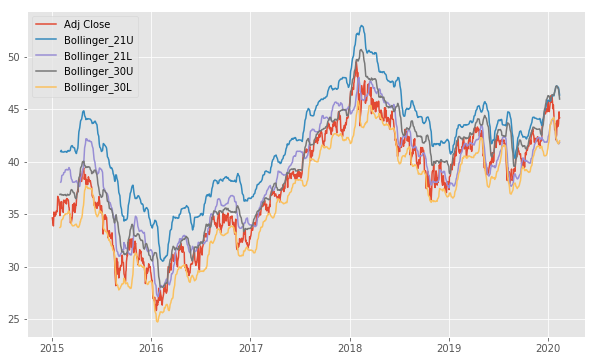

In [11]:
Boillinger_band_plt(EEM)

In [12]:
#print(EEM.columns)


In [13]:
EEM['Return']=np.log(EEM.Close).diff()
EEM.dropna(inplace=True)
#EEM.head()
EEM['Regime_30_21']=np.where(EEM['30_day_MA']>EEM['21_day_MA'],1,-1)
EEM['Regime_21_9']=np.where(EEM['21_day_MA']>EEM['9_day_MA'],1,-1)
EEM['Regime_30_9']=np.where(EEM['30_day_MA']>EEM['9_day_MA'],1,-1)
EEM['30_21_Strat_return']=EEM.Return*EEM['Regime_30_21']
EEM['21_9_Strat_return']=EEM.Return*EEM['Regime_21_9']
EEM['30_9_Strat_return']=EEM.Return*EEM['Regime_30_9']

In [14]:
def plotting_return_strat_3():
    with plt.style.context('ggplot'):
        plt.figure(figsize=(10,6))
        plt.plot(np.exp(EEM['30_9_Strat_return'].cumsum()),label='System')
        plt.plot(np.exp(EEM.Return.cumsum()),label='Buy/Hold')
        plt.legend()
        plt.title('Cross Over System')

In [15]:
def plotting_return_strat_2():
    with plt.style.context('ggplot'):
        plt.figure(figsize=(10,6))
        plt.plot(np.exp(EEM['21_9_Strat_return'].cumsum()),label='System')
        plt.plot(np.exp(EEM.Return.cumsum()),label='Buy/Hold')
        plt.legend()
        plt.title('Cross Over System')
        

In [16]:
def plotting_return_strat_1():
    with plt.style.context('ggplot'):
        plt.figure(figsize=(10,6))
        plt.plot(np.exp(EEM['30_21_Strat_return'].cumsum()),label='System')
        plt.plot(np.exp(EEM.Return.cumsum()),label='Buy/Hold')
        plt.legend()
        plt.title('Cross Over System')

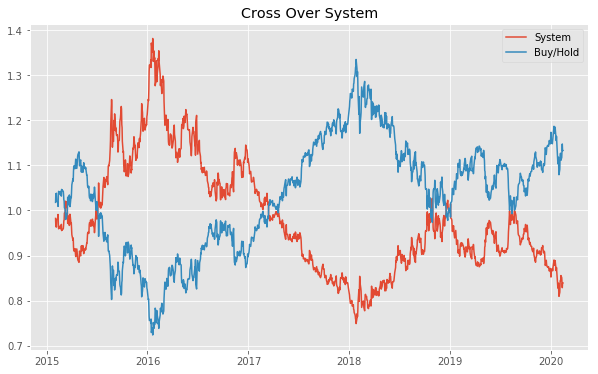

In [17]:
plotting_return_strat_1()

In [18]:
print("System total retuen: {:>10.2%}".format(np.exp(EEM['30_21_Strat_return'].sum())))
print("Buy/Hold total return :{:>10.2%}".format(np.exp(EEM.Return.sum())))

System total retuen:     83.95%
Buy/Hold total return :   113.28%


System total retuen:     79.23%
Buy/Hold total return :   113.28%


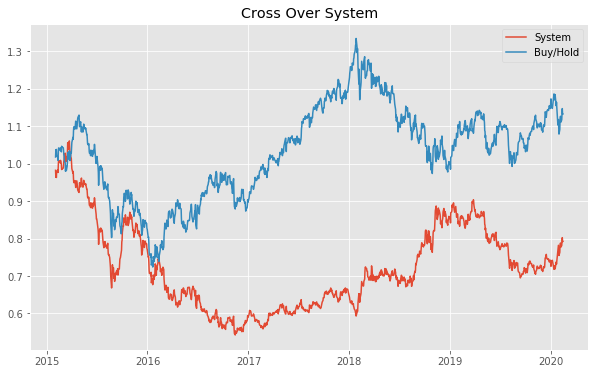

In [19]:
plotting_return_strat_2()
print("System total retuen: {:>10.2%}".format(np.exp(EEM['21_9_Strat_return'].sum())))
print("Buy/Hold total return :{:>10.2%}".format(np.exp(EEM.Return.sum())))

System total retuen:     89.51%
Buy/Hold total return :   113.28%


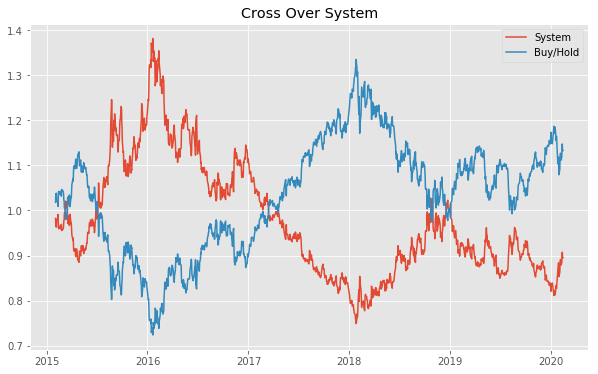

In [20]:
plotting_return_strat_3()
print("System total retuen: {:>10.2%}".format(np.exp(EEM['30_9_Strat_return'].sum())))
print("Buy/Hold total return :{:>10.2%}".format(np.exp(EEM.Return.sum())))

#### Convex Optimization

In [21]:
EEM.head(10)

,High,Low,Open,Close,Volume,Adj Close,Vwap,9_day_MA,9_day_stdiv,21_day_MA,...,Boillinger_Lower_band_21,Boillinger_Upper_band_30,Boillinger_Lower_band_30,Return,Regime_30_21,Regime_21_9,Regime_30_9,30_21_Strat_return,21_9_Strat_return,30_9_Strat_return
Date,,,,,,,,,,,,,,,,,,,,,
2015-02-02,39.869999,39.439999,39.529999,39.720001,50443600.0,35.515339,39.487497,40.153333,0.523546,39.531905,...,38.072678,36.922090,33.826934,0.017781,-1,-1,-1,-0.017781,-0.017781,-0.017781
2015-02-03,40.520000,40.110001,40.160000,40.470001,48552700.0,36.185944,39.516907,40.197777,0.502538,39.578095,...,38.103001,36.935880,34.026842,0.018706,-1,-1,-1,-0.018706,-0.018706,-0.018706
2015-02-04,40.639999,40.209999,40.419998,40.270000,34900700.0,36.007118,39.539528,40.187777,0.496407,39.668571,...,38.233521,36.853225,34.319621,-0.004954,-1,-1,-1,0.004954,0.004954,0.004954
2015-02-05,40.540001,40.139999,40.150002,40.509998,32092400.0,36.221710,39.557453,40.113333,0.436349,39.766667,...,38.514895,36.879824,34.451285,0.005942,-1,-1,-1,-0.005942,-0.005942,-0.005942
2015-02-06,40.119999,39.709999,39.910000,39.820000,64292000.0,35.604755,39.572805,40.033333,0.393700,39.830476,...,38.704627,36.881688,34.486976,-0.017180,-1,-1,-1,0.017180,0.017180,0.017180
2015-02-09,39.889999,39.680000,39.689999,39.759998,35632500.0,35.551105,39.577737,39.965555,0.394560,39.848571,...,38.745879,36.875277,34.537200,-0.001508,-1,-1,-1,0.001508,0.001508,0.001508
2015-02-10,39.720001,39.500000,39.630001,39.660000,46949400.0,35.461689,39.578696,39.873333,0.360035,39.853809,...,38.756641,36.838977,34.636983,-0.002518,-1,-1,-1,0.002518,0.002518,0.002518
2015-02-11,39.490002,39.099998,39.340000,39.369999,44240300.0,35.202389,39.570968,39.792222,0.391081,39.862857,...,38.787141,36.834686,34.648428,-0.007339,-1,1,-1,0.007339,-0.007339,0.007339
2015-02-12,40.270000,39.770000,39.799999,40.209999,55855400.0,35.953472,39.585897,39.847777,0.345245,39.879524,...,38.819949,36.820241,34.764806,0.021112,-1,1,-1,-0.021112,0.021112,-0.021112
